In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

import itertools
import glob

In [70]:
%run code/plotting.py
%run code/spice_tools.py
%run code/simulation_tools.py

In [57]:
results_folder = "../results/baseline"

In [58]:
df_simulation = read_simulation_results(f"{results_folder}/lro_dependent_variable_history.dat")
df_simulation

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,33,33,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,9.853265e-10
2010-06-26 06:01:16.184257792,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,34,34,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,8.758443e-10
2010-06-26 06:01:26.184243968,162402.450080,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,34,34,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,7.744810e-10
2010-06-26 06:01:36.184270080,178670.014833,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,35,35,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,7.230555e-10
2010-06-26 06:01:46.184256000,194922.381410,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,32,32,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,7.207429e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22597.092554,-29416.191651,-1.796482e+06,1633.021241,215.420618,27.774968,1.787305e+06,0.008442,1.552923,0.703062,...,34,34,3.308379e+08,1.796865e+06,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,6.060738e-10
2010-06-26 15:25:36.184264704,38926.114683,-27260.752734,-1.796128e+06,1632.760132,215.664088,42.952959,1.787304e+06,0.008440,1.552923,0.703298,...,34,34,3.308379e+08,1.796757e+06,1.524594e+11,1.518297,0.000012,6.731700e-08,6.776221e-08,6.561751e-10
2010-06-26 15:25:46.184250624,55251.834119,-25102.971469,-1.795623e+06,1632.360699,215.889089,58.129920,1.787302e+06,0.008439,1.552923,0.703576,...,32,32,3.308379e+08,1.796648e+06,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,7.390753e-10
2010-06-26 15:25:56.184236800,71572.867469,-22943.032355,-1.794966e+06,1631.822906,216.095672,73.304563,1.787299e+06,0.008439,1.552922,0.703899,...,32,32,3.308380e+08,1.796539e+06,1.524594e+11,1.518635,0.000012,6.730590e-08,6.775291e-08,8.510681e-10


In [59]:
df_ephemeris = generate_lro_ephemeris(df_simulation["t_et"])
df_ephemeris

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,t_et,r
t,,,,,,,,
2010-06-26 06:01:06.184231680,129827.263859,-11849.086014,-1.790239e+06,1629.955691,216.321125,126.742167,3.308041e+08,1.794980e+06
2010-06-26 06:01:16.184257792,146121.070764,-9685.381514,-1.788896e+06,1628.782488,216.416766,141.908965,3.308041e+08,1.794880e+06
2010-06-26 06:01:26.184243968,162402.449919,-7520.810983,-1.787401e+06,1627.470185,216.494321,157.065019,3.308041e+08,1.794780e+06
2010-06-26 06:01:36.184270080,178670.012113,-5355.555569,-1.785755e+06,1626.019184,216.553733,172.208456,3.308041e+08,1.794679e+06
2010-06-26 06:01:46.184256000,194922.373413,-3189.796959,-1.783957e+06,1624.430132,216.594956,187.337573,3.308041e+08,1.794577e+06
...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22698.314171,-29400.847664,-1.796482e+06,1633.020438,215.399876,27.864838,3.308379e+08,1.796866e+06
2010-06-26 15:25:36.184264704,39027.323512,-27245.616594,-1.796128e+06,1632.758384,215.643261,43.042580,3.308379e+08,1.796758e+06
2010-06-26 15:25:46.184250624,55353.020924,-25088.044015,-1.795621e+06,1632.358053,215.868179,58.219175,3.308379e+08,1.796650e+06


In [60]:
def calculate_eclipse_times(timestamps):
    occultations = calculate_eclipses("Sun", "Earth", "LRO", timestamps[0], timestamps[-1])
    return occultations
calculate_eclipse_times(df_simulation["t_et"])

[(330818018.7974655, 330819839.6175095, 'PARTIAL'),
 (330819839.6175095, 330821578.9116696, 'FULL'),
 (330821578.9116696, 330827283.0030431, 'PARTIAL'),
 (330827283.0030431, 330829022.5365491, 'FULL'),
 (330829022.5365491, 330830860.12614715, 'PARTIAL')]

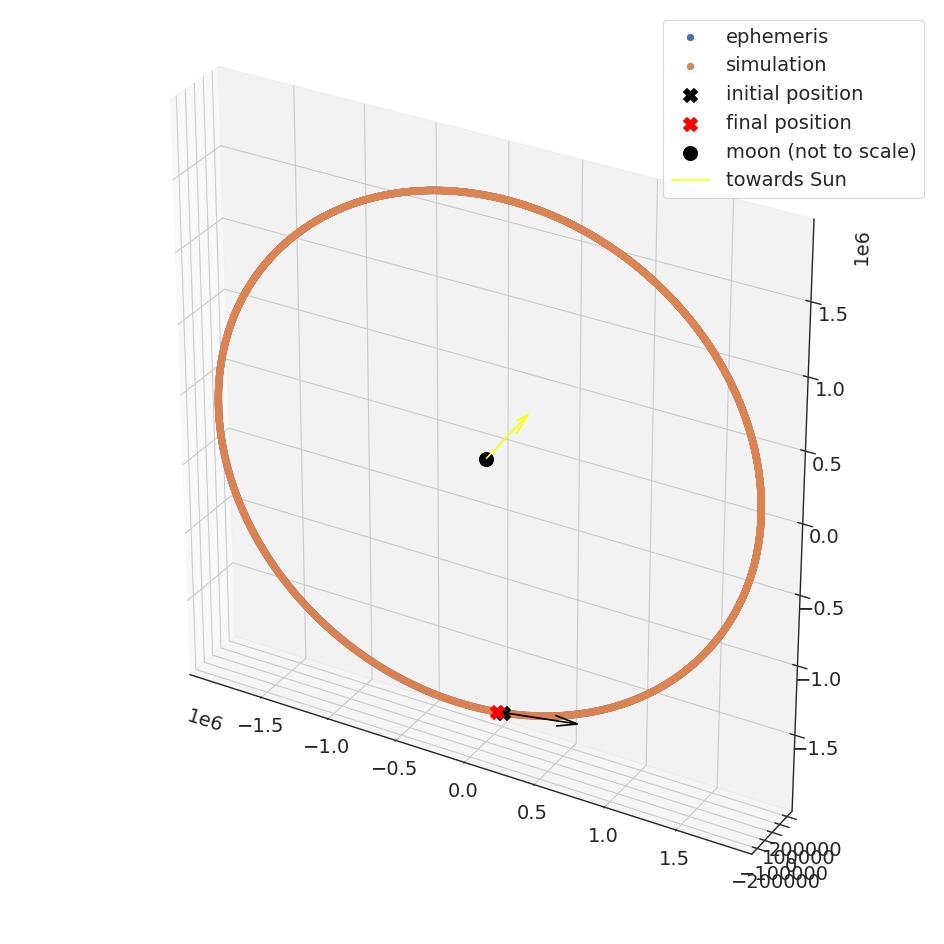

In [61]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot(df, label):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
    
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  df[f"{acc_name}_x"], df[f"{acc_name}_y"], df[f"{acc_name}_z"], length=2e9, zorder=-1)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d', computed_zorder=False)
    
    # do_plot(df.loc["2009-07-10":"2009-07-20"])
    # do_plot(df.loc["2009-10-10":"2009-10-20"])
    # do_plot(df.loc["2010-01-01":"2010-01-02"])
    
    do_plot(df_ephemeris, "ephemeris")
    do_plot_with_acc(df_simulation, "simulation", "acc_rp_sun")
    
    df_init = df_ephemeris.iloc[0]
    df_final = df_ephemeris.iloc[-1]
    ax.quiver(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], df_init["vel_x"], df_init["vel_y"], df_init["vel_z"], color="black", length=5e5, normalize=True)
    ax.scatter(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], c="black", marker="X", s=100, label="initial position", zorder=5)
    ax.scatter(df_final["pos_x"], df_final["pos_y"], df_final["pos_z"], c="red", marker="X", s=100, label="final position", zorder=5)
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    pos_sun_init = df_simulation[["pos_sun_x", "pos_sun_y", "pos_sun_z"]].iloc[0] / df_simulation["r_sun"].iloc[0]
    ax.quiver(0, 0, 0, *pos_sun_init, length=6e5, color="yellow", label="towards Sun")
    
    limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
    ax.set_box_aspect(np.ptp(limits, axis=1))
    # Or once Matplotlib 3.6 is released: https://stackoverflow.com/a/72928548
    
    plt.legend()
    
plot_orbit_3d(df_ephemeris, df_simulation)

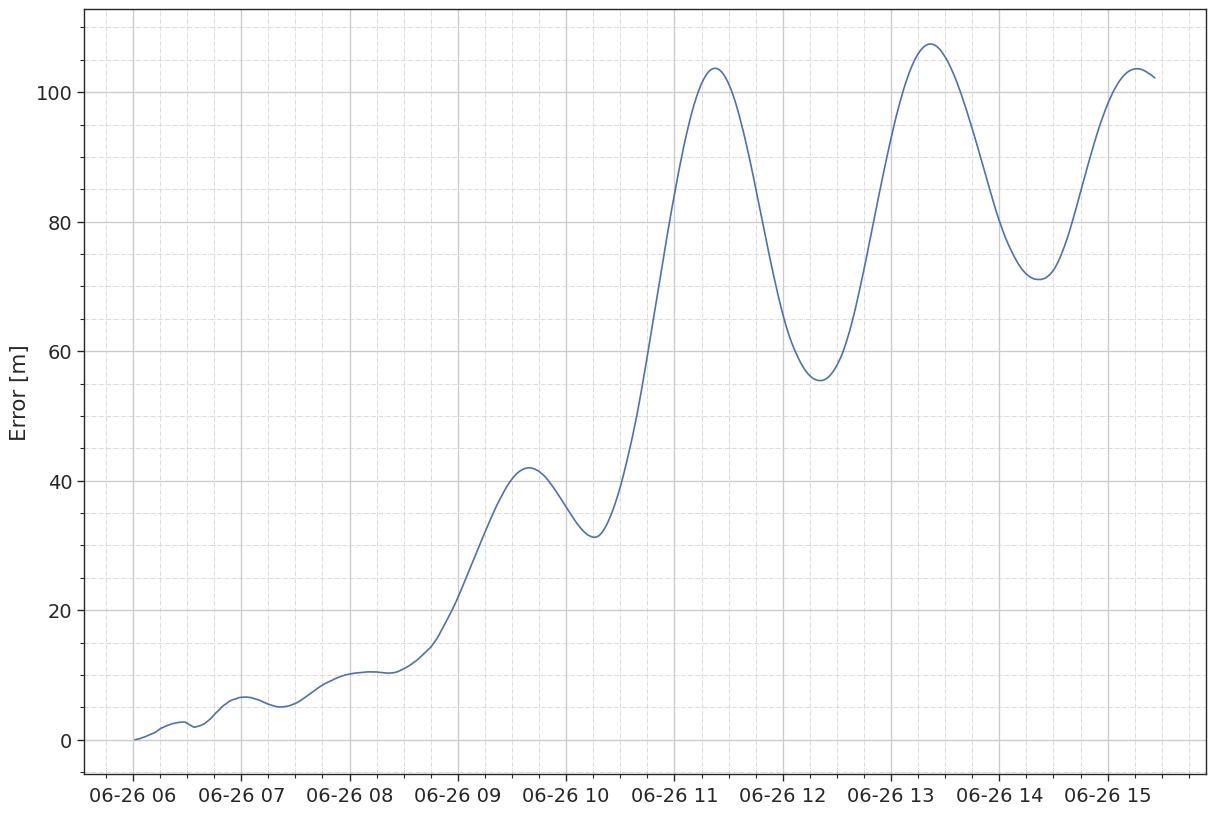

In [62]:
def plot_error(df_ephemeris, df_simulation):
    error = df_ephemeris[pos_names] - df_simulation[pos_names]
    error["total"] = np.sqrt(np.square(error).sum(axis=1))
    
    plt.figure(figsize=[12, 8])
    plt.plot(error.index, error["total"])
    plt.ylabel("Error [m]")
    format_plot()
    
plot_error(df_ephemeris, df_simulation)

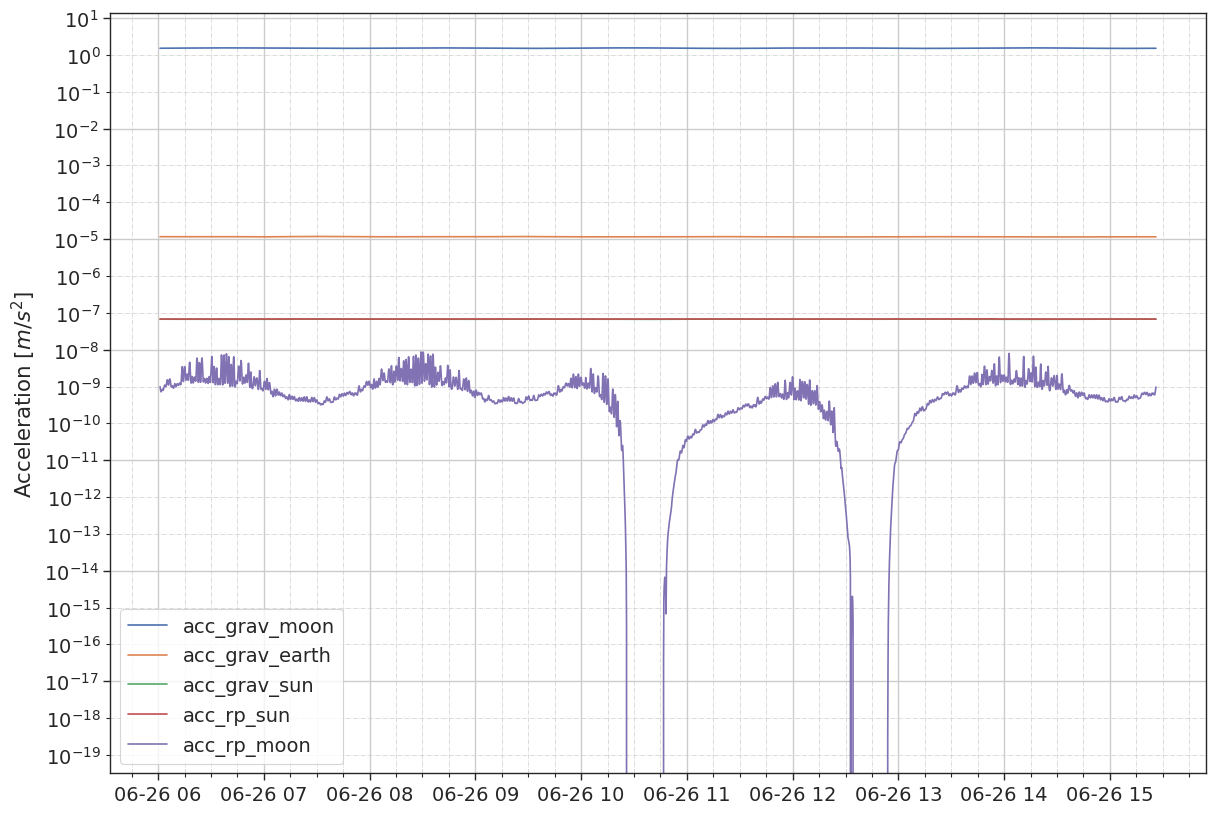

In [63]:
def plot_accelerations(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for acc in acc_names:
        plt.plot(df_simulation.index, df_simulation[acc], label=acc)
    
    plt.legend()
    plt.ylabel("Acceleration [$m/s^2$]")
    plt.yscale("log")
    format_plot(ylocator=LogLocator(base=10, subs="all", numticks=100))
    
plot_accelerations(df_simulation)

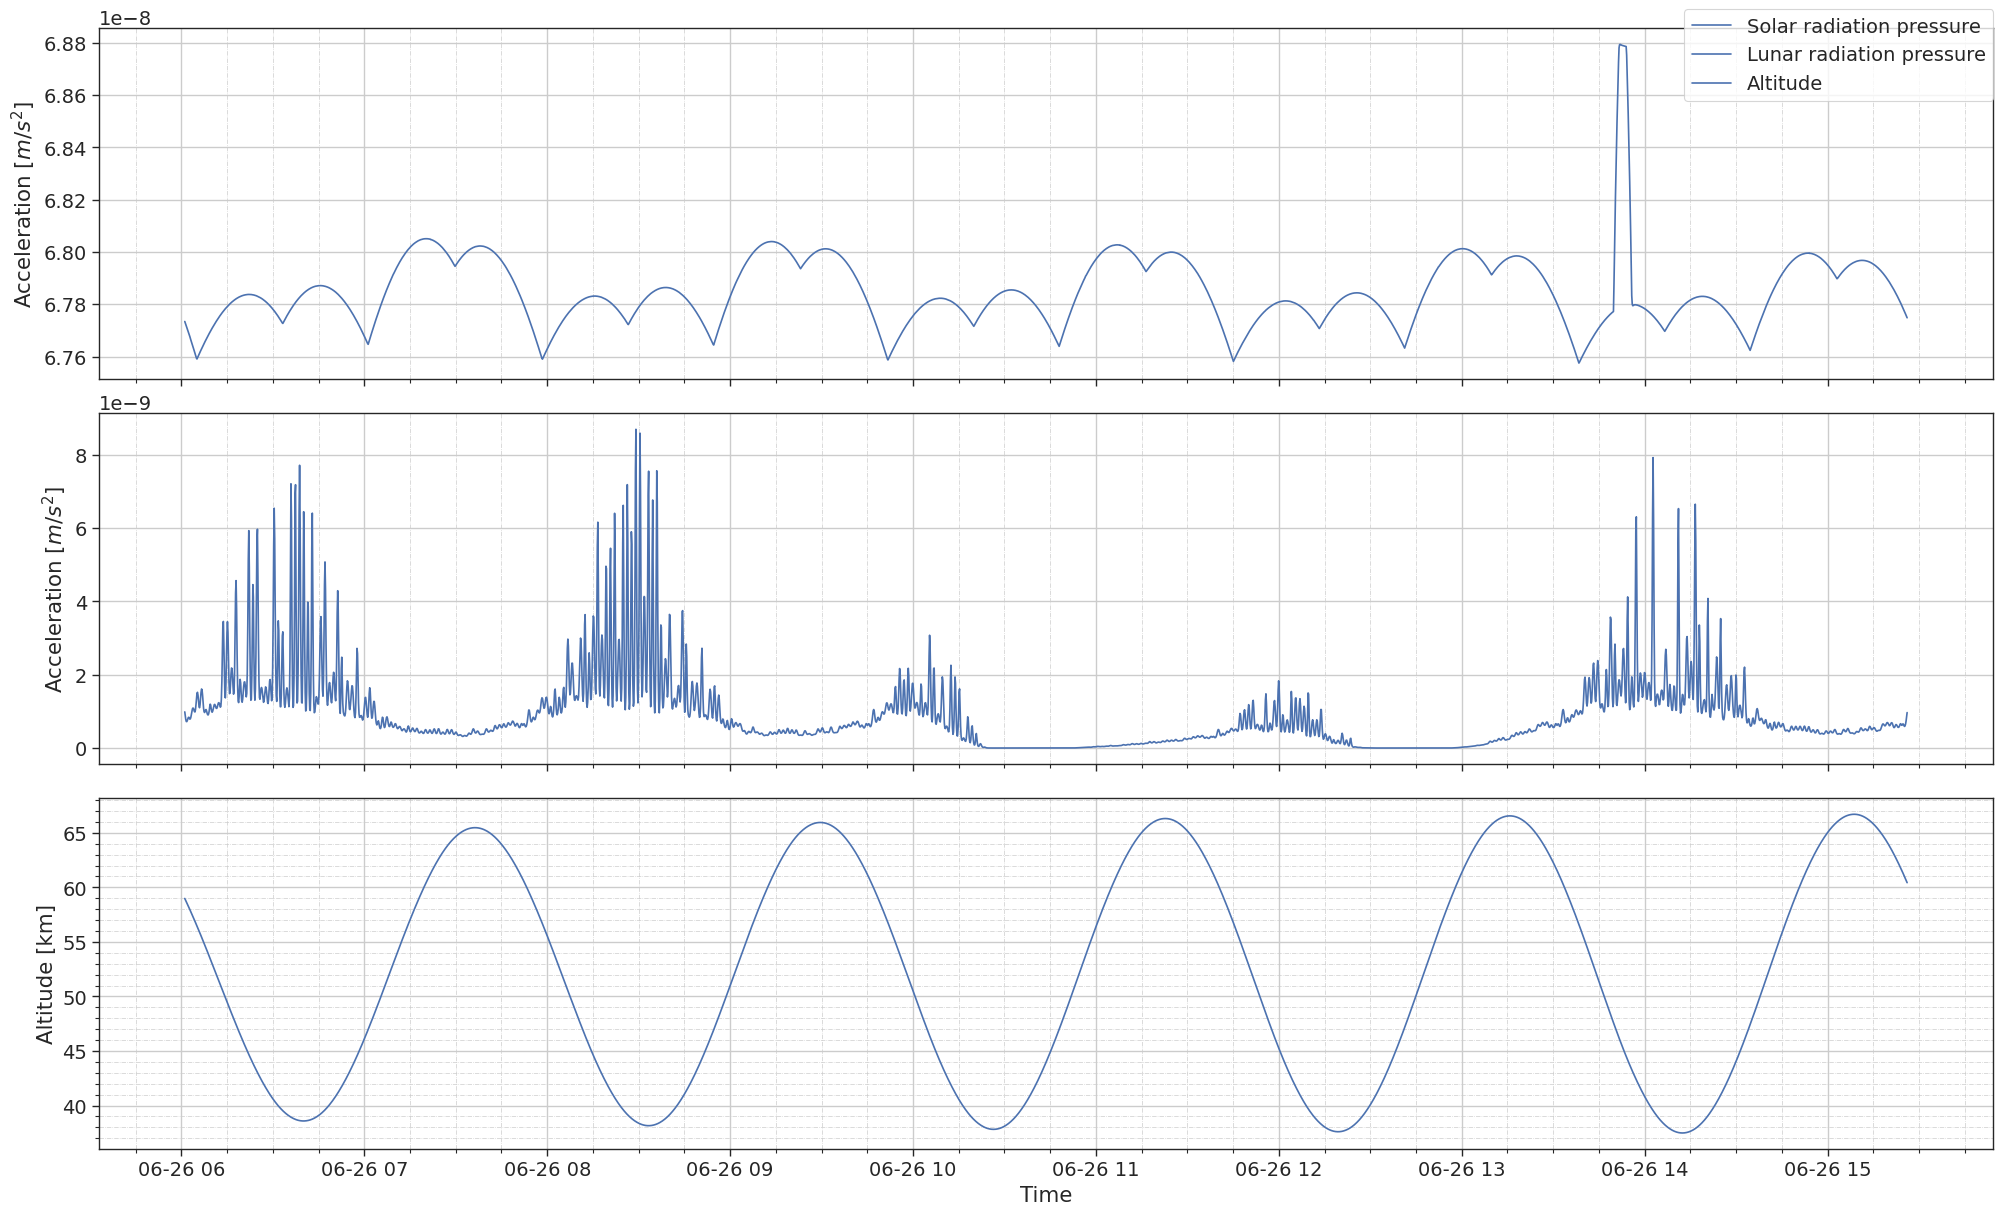

In [64]:
def plot_rp_acceleration(df_simulation):
    fig, axs = plt.subplots(3, 1, figsize=[20, 12], sharex=True)
    
    axs[0].plot(df_simulation.index, df_simulation["acc_rp_sun"], label="Solar radiation pressure")
    axs[1].plot(df_simulation.index, df_simulation["acc_rp_moon"], label="Lunar radiation pressure")
    axs[2].plot(df_simulation.index, (df_simulation["r"]-moon_polar_radius) / 1e3, label="Altitude")
    
    axs[-1].set_xlabel("Time")
    axs[0].set_ylabel("Acceleration [$m/s^2$]")
    axs[1].set_ylabel("Acceleration [$m/s^2$]")
    axs[2].set_ylabel("Altitude [km]")
    fig.legend()
    
    format_plot()
    
plot_rp_acceleration(df_simulation)

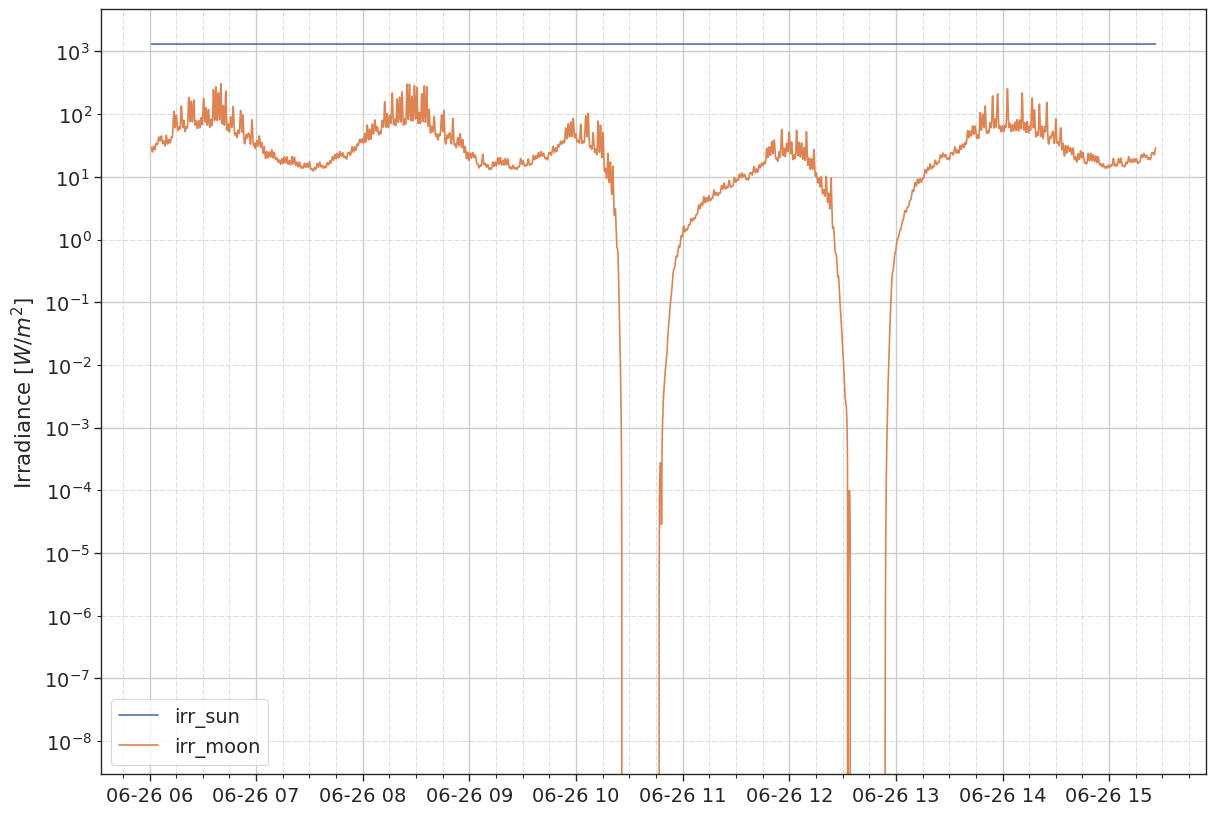

In [65]:
def plot_received_irradiance(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for irr in irr_names:
        plt.plot(df_simulation.index, df_simulation[irr], label=irr)
    
    plt.legend()
    plt.ylabel("Irradiance [$W/m^2$]")
    plt.yscale("log")
    format_plot(ylocator=LogLocator(base=10, subs="all", numticks=100))
    
plot_received_irradiance(df_simulation)

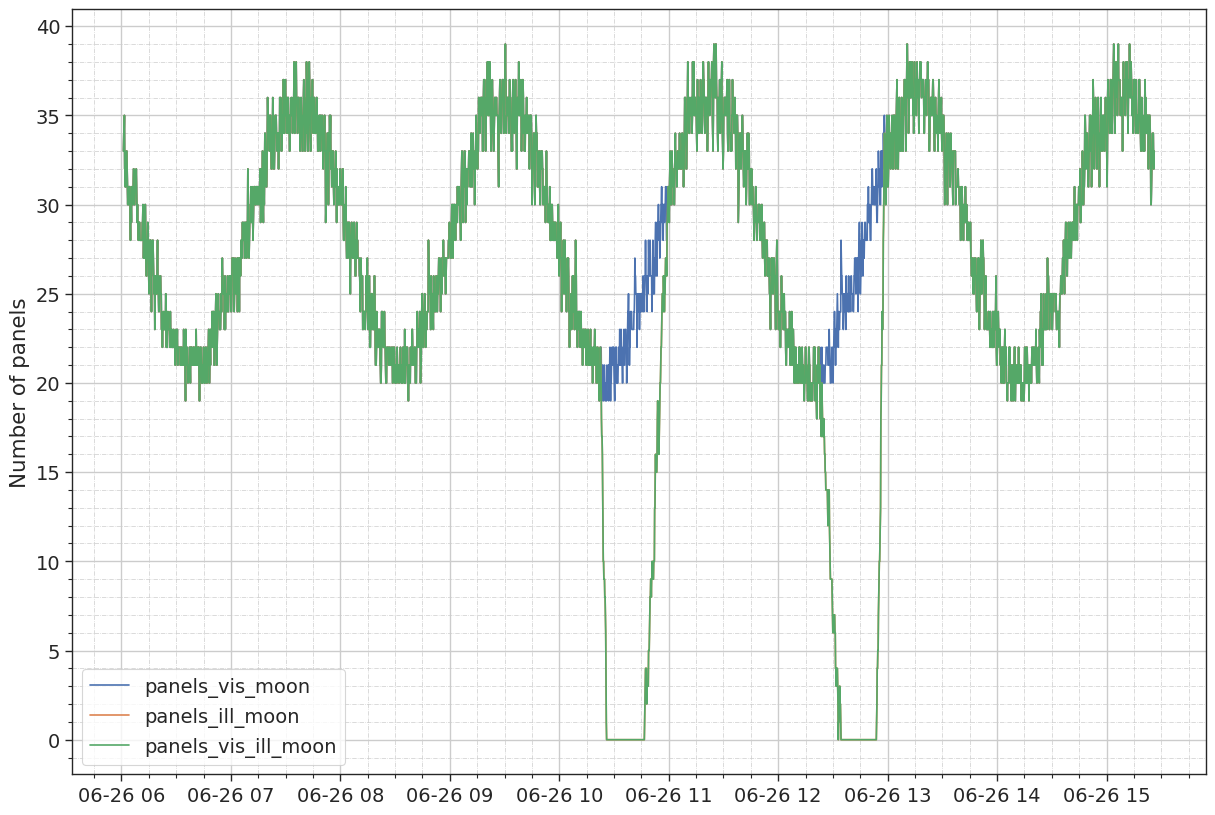

In [75]:
def plot_source_panels(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for panel_count in panels_count_names:
        plt.plot(df_simulation.index, df_simulation[panel_count], label=panel_count)
    
    plt.legend()
    plt.ylabel("Number of panels")
    format_plot()
    
plot_source_panels(df_simulation)

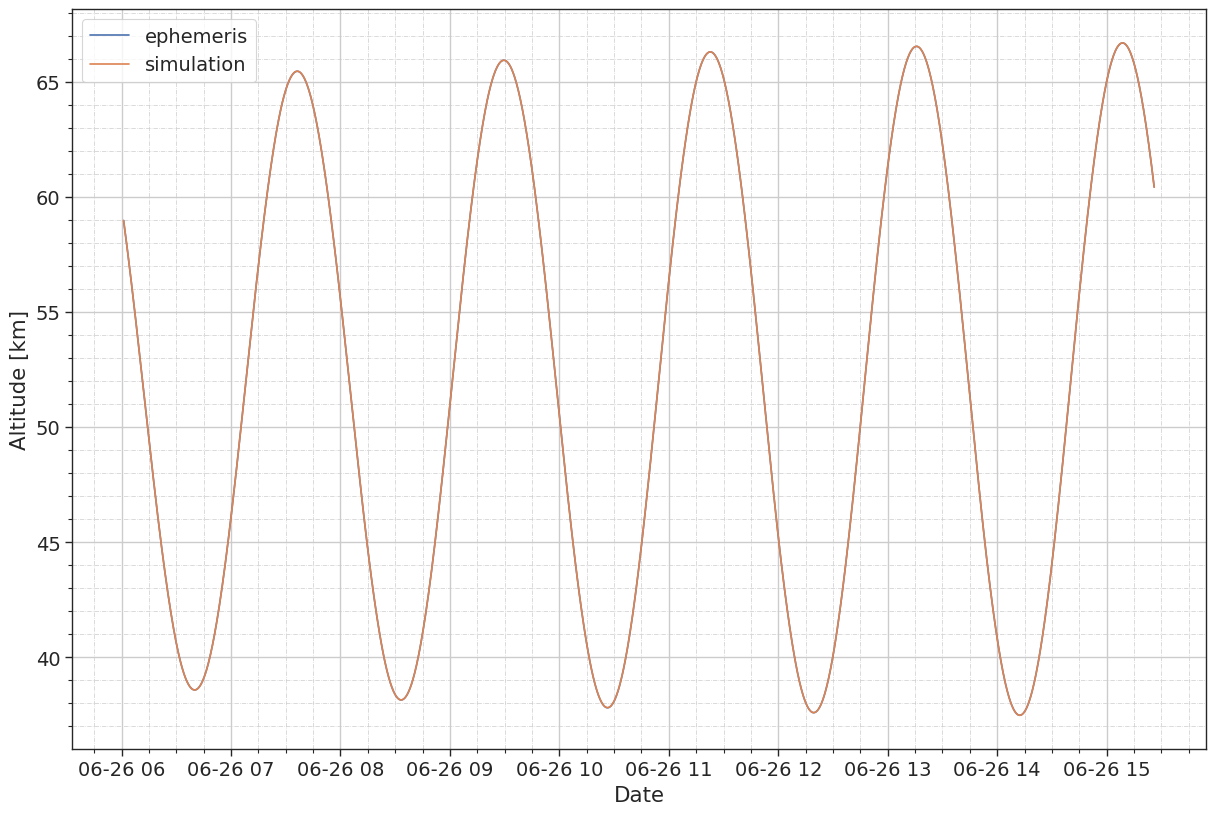

In [67]:
def plot_altitude(df_ephemeris, df_simulation):
    from datetime import datetime as dt
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius) / 1e3, label="ephemeris")
    plt.plot(df_simulation.index, (df_simulation["r"]-moon_polar_radius) / 1e3, label="simulation")
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    format_plot()

plot_altitude(df_ephemeris, df_simulation)

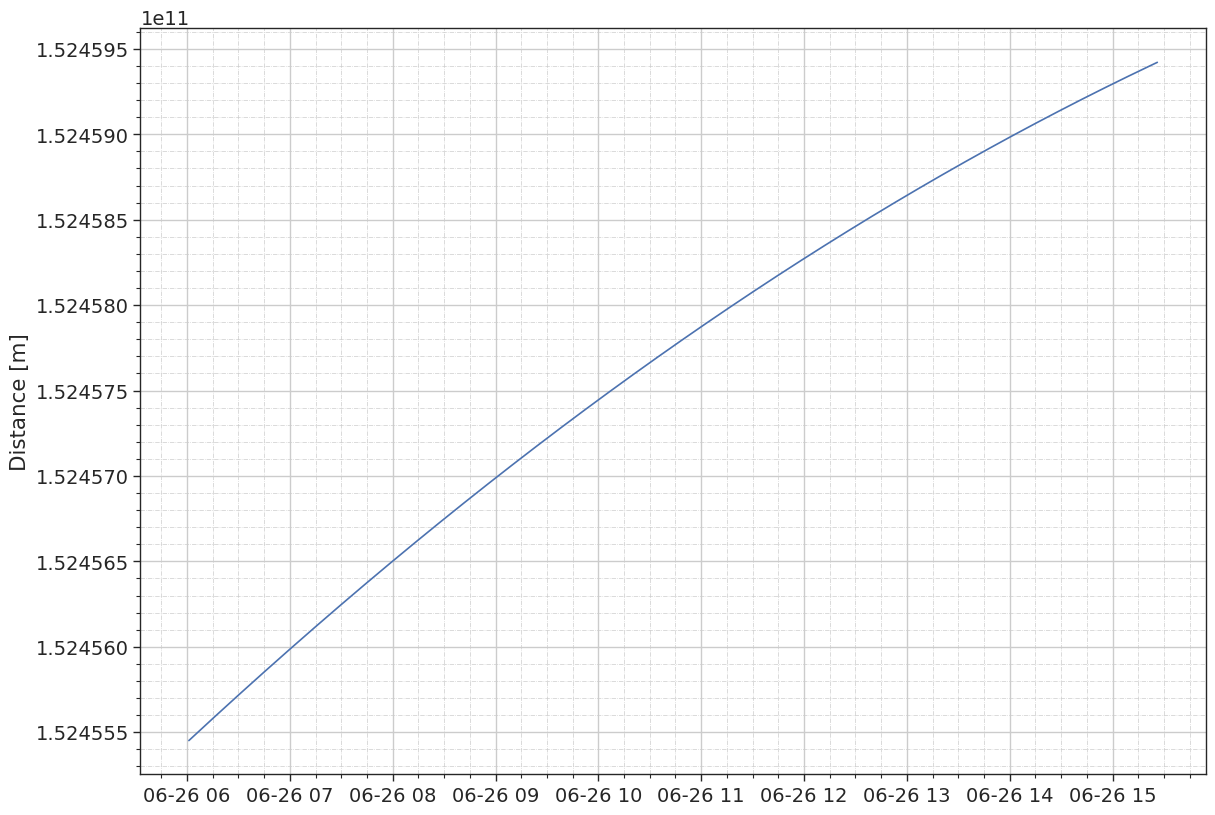

In [68]:
def plot_distance_moon_sun(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["r_sun"])
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.ylabel("Distance [m]")
    format_plot()
    
plot_distance_moon_sun(df_simulation)

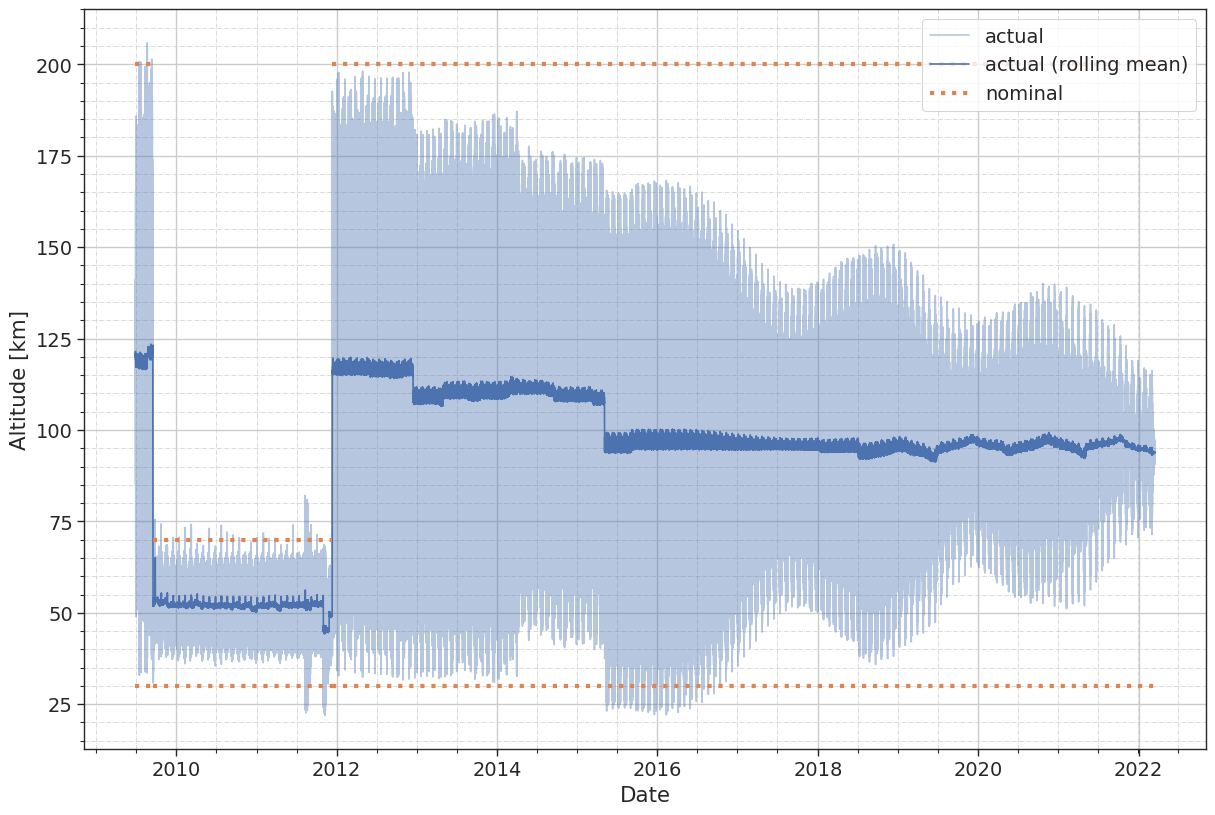

In [69]:
def plot_altitude_mission():
    from datetime import datetime as dt
    from matplotlib import dates
    
    t_start = as_et("2009-06-28")  # start of commissioning
    t_end = as_et("2022-03-15")    # latest available date
    t_et = np.arange(t_start, t_end, 60*60)  # hourly
    df_ephemeris = generate_lro_ephemeris(t_et)
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius) / 1e3, c="C0", alpha=0.4, label="actual")
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius).rolling(20).mean() / 1e3, c="C0", label="actual (rolling mean)")
    
    plt.hlines(50-20, dates.datestr2num("2009-9-16"), dates.datestr2num("2011-12-12"), color="C1", ls=":", lw=3, label="nominal")
    plt.hlines(50+20, dates.datestr2num("2009-9-16"), dates.datestr2num("2011-12-12"), color="C1", ls=":", lw=3)
    plt.hlines(30, dates.datestr2num("2009-06-28"), dates.datestr2num("2009-9-16"), color="C1", ls=":", lw=3)
    plt.hlines(200, dates.datestr2num("2009-06-28"), dates.datestr2num("2009-9-16"), color="C1", ls=":", lw=3)
    plt.hlines(30, dates.datestr2num("2011-12-12"), dates.datestr2num("2022-03-15"), color="C1", ls=":", lw=3)
    plt.hlines(200, dates.datestr2num("2011-12-12"), dates.datestr2num("2022-03-15"), color="C1", ls=":", lw=3)
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    # plt.xlim([dt(2009, 9, 1), dt(2009, 11, 1)]) # entering mission orbit
    # plt.xlim([dt(2009, 9, 10), dt(2010, 6, 30)])
    
    format_plot()
    
plot_altitude_mission()